In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df = pd.read_csv('uber.csv')
df.head(10)

,Name,trip,Accept Rate,Supply hours,Rating
0,Abdul,1,100,3,4.8
1,Aderline,12,83,5,4.7
2,akilash,1,100,2,4.7
3,alec,1,100,2,4.9
4,aieshna,21,76,11,5.0
5,alvaro,7,100,4,4.8
6,andra,17,94,11,4.6
7,augusta,16,90,11,4.7
8,aurora,19,89,11,4.7
9,basker,10,88,4,4.6


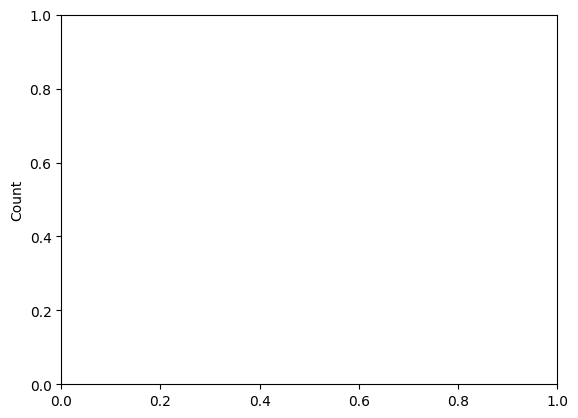

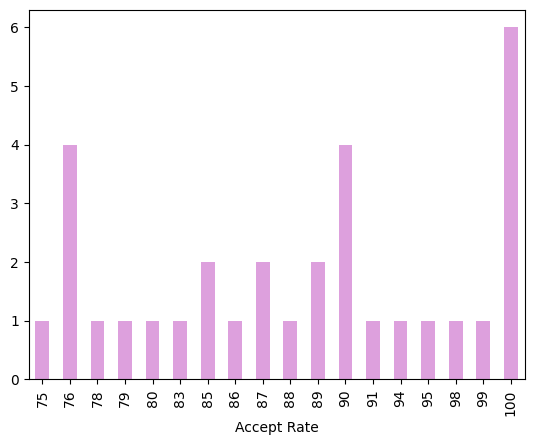

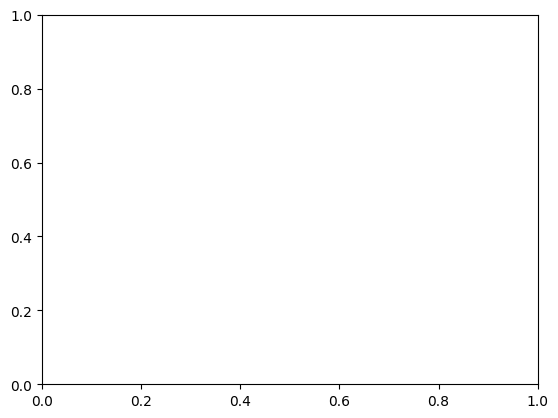

In [47]:
def plot_counts(ax):

    for c in ax.containers:


        ax.bar_label(c, labels=labels, label_type='centre', frontsize=8)
plt.ylabel("Count")
plt.show()

ax = df.groupby("Accept Rate")["Name"].count().reset_index().plot(kind= 'bar', stacked=False, x='Accept Rate', color='Plum', legend=False)
fig, ax = plt.subplots()
plot_counts(ax)

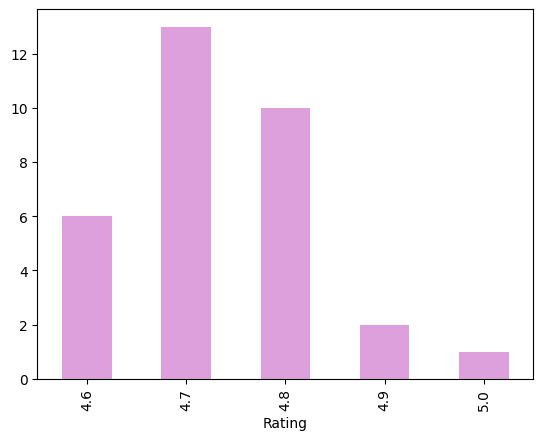

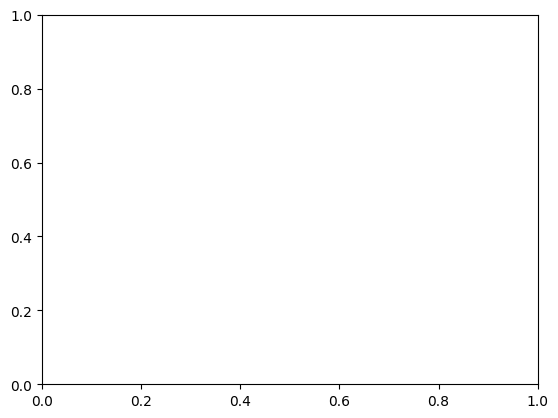

In [48]:
ax = df.groupby("Rating")["Name"].count().reset_index().plot(kind= 'bar', stacked=False, x='Rating', color='Plum', legend=False)
fig, ax = plt.subplots()
plot_counts(ax)

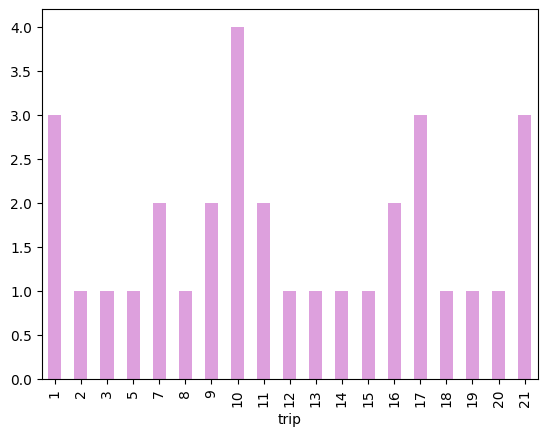

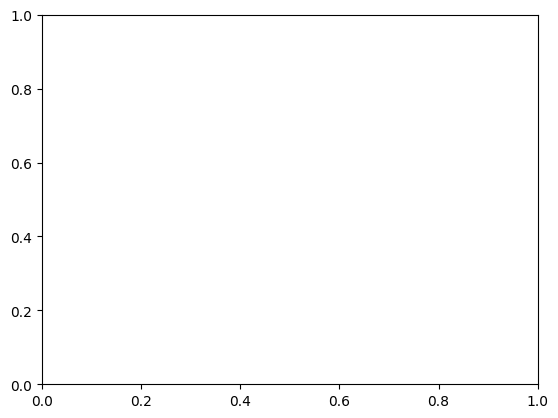

In [49]:
ax = df.groupby("trip")["Name"].count().reset_index().plot(kind= 'bar', stacked=False, x='trip', color='Plum', legend=False)
fig, ax = plt.subplots()
plot_counts(ax)

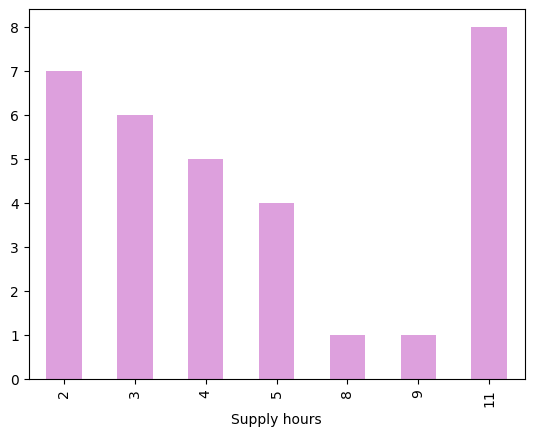

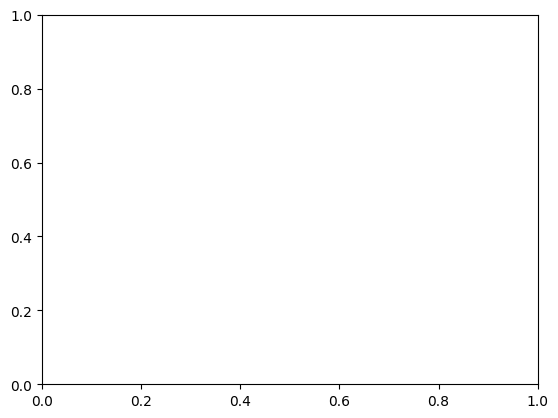

In [50]:
ax = df.groupby("Supply hours")["Name"].count().reset_index().plot(kind= 'bar', stacked=False, x='Supply hours', color='Plum', legend=False)
fig, ax = plt.subplots()
plot_counts(ax)

In [51]:
 # filter by given conditions
first_option_df = df[(df['Supply hours'] >= 8) & (df['trip'] >= 10) &
                      (df['Accept Rate'] >= 90) & (df['Rating'] >= 4.7)]
first_option_df.head()

,Name,trip,Accept Rate,Supply hours,Rating
7,augusta,16,90,11,4.7
30,oren,11,91,9,4.8
31,phyills,10,90,8,4.8


In [52]:
# filter by given condition
first_option_total_payout = 50 * len(first_option_df)
print('$'+str(first_option_total_payout))

$150


In [53]:
# filter by given condition
second_option_df = df[(df['trip'] >= 12) & (df['Rating'] >= 4.7)]
second_option_df.head()

,Name,trip,Accept Rate,Supply hours,Rating
1,Aderline,12,83,5,4.7
4,aieshna,21,76,11,5.0
7,augusta,16,90,11,4.7
8,aurora,19,89,11,4.7
10,bunny,21,90,2,4.8


In [54]:
second_option_total_payout = 4 * second_option_df['trip'].sum()
print('$' +str(second_option_total_payout))

$840


In [32]:
str('$') + str(df[(df['trip'] >= 12) & (df['Rating'] >= 4.7)]['trip'].sum() *4)

'$840'

In [55]:
 # merge all and see if both dataset includes the driver from_merge column
 df_all = first_option_df.merge(second_option_df, on=first_option_df.columns.to_list(), how='left', indicator=True)
 df_all

,Name,trip,Accept Rate,Supply hours,Rating,_merge
0,augusta,16,90,11,4.7,both
1,oren,11,91,9,4.8,left_only
2,phyills,10,90,8,4.8,left_only


In [57]:
# include by only option
df_all[df_all["_merge"] == 'left_only']

,Name,trip,Accept Rate,Supply hours,Rating,_merge
1,oren,11,91,9,4.8,left_only
2,phyills,10,90,8,4.8,left_only


In [59]:
fourth_option_df = df[(df['trip'] < 10) & (df['Accept Rate'] < 90) & (df['Rating']  > 4.7)]
fourth_option_df

,Name,trip,Accept Rate,Supply hours,Rating
12,buddy,9,75,5,4.8
15,bavesh,9,79,5,4.9


In [60]:
print(str(len(fourth_option_df) / len(df) * 100)+"%")

6.25%


In [63]:
# Without partener with uber
total_weeks_per_year = 52
weeks_off = 3
fare_per_day = 200
workday_per_week = 6
total_months_per_year = 12
# expenses
gas_per_week = 200
insurance_per_month = 400
vehical_rent_by_week = 500

total_expenses = (gas_per_week + vehical_rent_by_week) * (total_weeks_per_year - weeks_off) + insurance_per_month * total_months_per_year
print('$'+str(total_expenses))

$39100


In [65]:
total_revenue = (total_weeks_per_year - weeks_off) * workday_per_week * fare_per_day
print('$' +str(total_revenue))

$58800


In [67]:
profit_margin = total_revenue - total_expenses
print('$' +str(profit_margin))

$19700


In [72]:
# calculate new expenses
gas_per_week = gas_per_week * 1.05
insurance_per_month = insurance_per_month * 0.8
new_car = 40000

new_total_expenses = new_car + gas_per_week * (total_weeks_per_year - weeks_off) + insurance_per_month * total_months_per_year

print('$' +str(new_total_expenses))

$53878.04125


In [73]:
new_profit_margin = total_revenue - new_total_expenses
print('$' +str(new_profit_margin))

$4921.958749999998


In [75]:
# caluculate the weekly fare increse
fare_inctrease = (profit_margin - new_profit_margin) / (total_weeks_per_year - weeks_off)
print('$' +str(fare_inctrease))

$301.5926785714286
